## A binary classification model that predicts whether an email is Spam or Ham.
The goal is to minimize false positives while maintaining high spam detection accuracy.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("spam.xlsx")

## Data Preprocessing

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [9]:
df.shape

(5572, 2)

In [32]:
# Checking null values
df.isnull().sum()

label         0
message       0
msg_length    0
dtype: int64

In [31]:
# Checking Duplicate values
df.duplicated().sum()

np.int64(403)

In [30]:
# Checking datatypes
df['message'] = df['message'].astype(str)
df['label'] = df['label'].astype(int)

# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

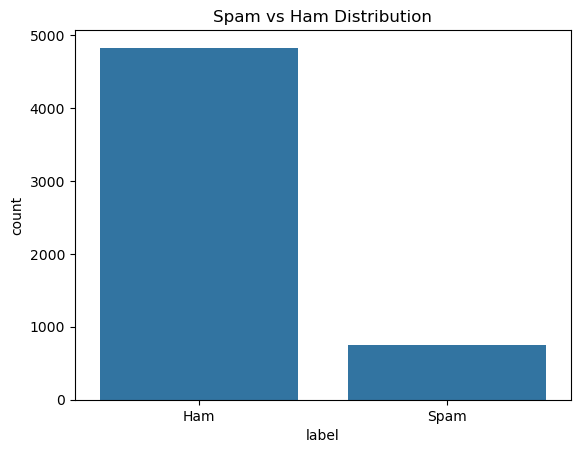

In [12]:
sns.countplot(x='label', data=df)
plt.xticks([0,1], ['Ham', 'Spam'])
plt.title("Spam vs Ham Distribution")
plt.show()


In [15]:
df['msg_length'] = df['message'].apply(len)

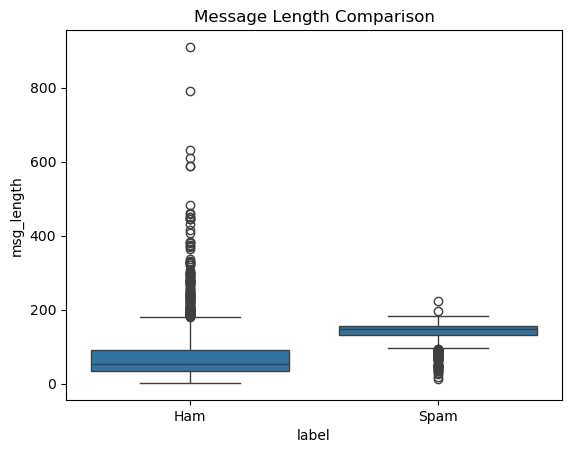

In [33]:
sns.boxplot(x=df['label'], y=df['msg_length'])
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Message Length Comparison")
plt.show()

# Model training

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_curve, auc
)

In [35]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Text vectorization (TF-IDF)

In [21]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Model Evaluation

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Confusion matrix Visualization

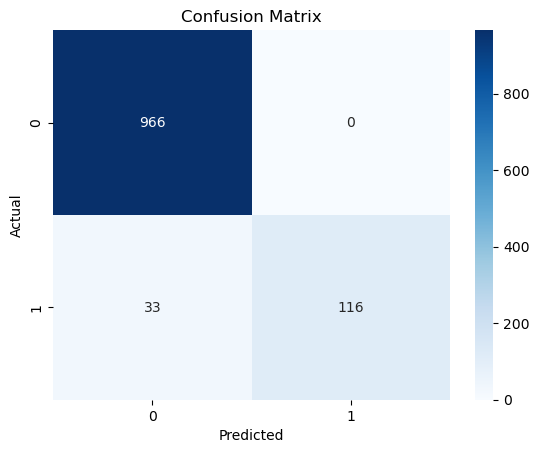

In [24]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

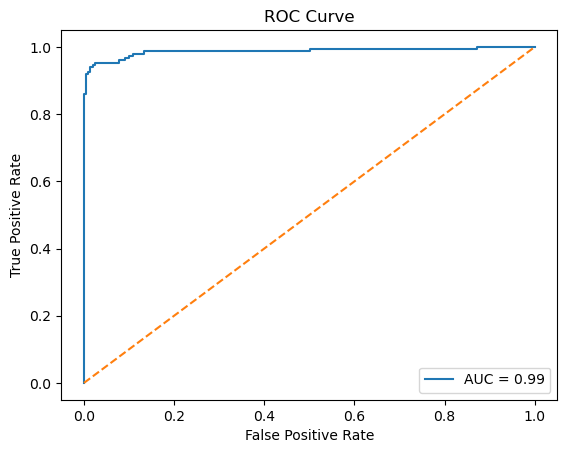

In [36]:
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
# plt.plot([0,1], [0,1], linestyle='--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()

## Spam/Ham Prediction

In [26]:
def predict_spam(text):
    # Transform user text using trained TF-IDF vectorizer
    text_tfidf = vectorizer.transform([text])
    
    # Predict class
    prediction = model.predict(text_tfidf)[0]
    
    # Predict probability
    probability = model.predict_proba(text_tfidf)[0][1]
    
    if prediction == 1:
        return f"🚨 SPAM EMAIL (Spam Probability: {probability:.2f})"
    else:
        return f"✅ HAM EMAIL (Spam Probability: {probability:.2f})"


In [28]:
user_text = input("Enter email message: ")
result = predict_spam(user_text)
print(result)

Enter email message:  URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18


🚨 SPAM EMAIL (Spam Probability: 0.96)


## Conclusion

The trained Logistic Regression model predicts the probability of an email being spam. Based on a classification threshold, the system labels the input as Spam or Ham.